In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import CSV

In [11]:
# Load the data from the uploaded CSV files
data = pd.read_csv('drive/MyDrive/merged_affiliations.csv')
#authors_df = pd.read_csv('drive/MyDrive/merged_authors.csv')
#researches_df = pd.read_csv('drive/MyDrive/merged_researches.csv')

# Display the first few rows of each DataFrame to understand their structure
#(affiliations_df.head(), authors_df.head(), researches_df.head())

<ipython-input-22-ae9885e7cd29>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_city_counts['country_id'] = top_city_counts['country'].map(unique_country_ids)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


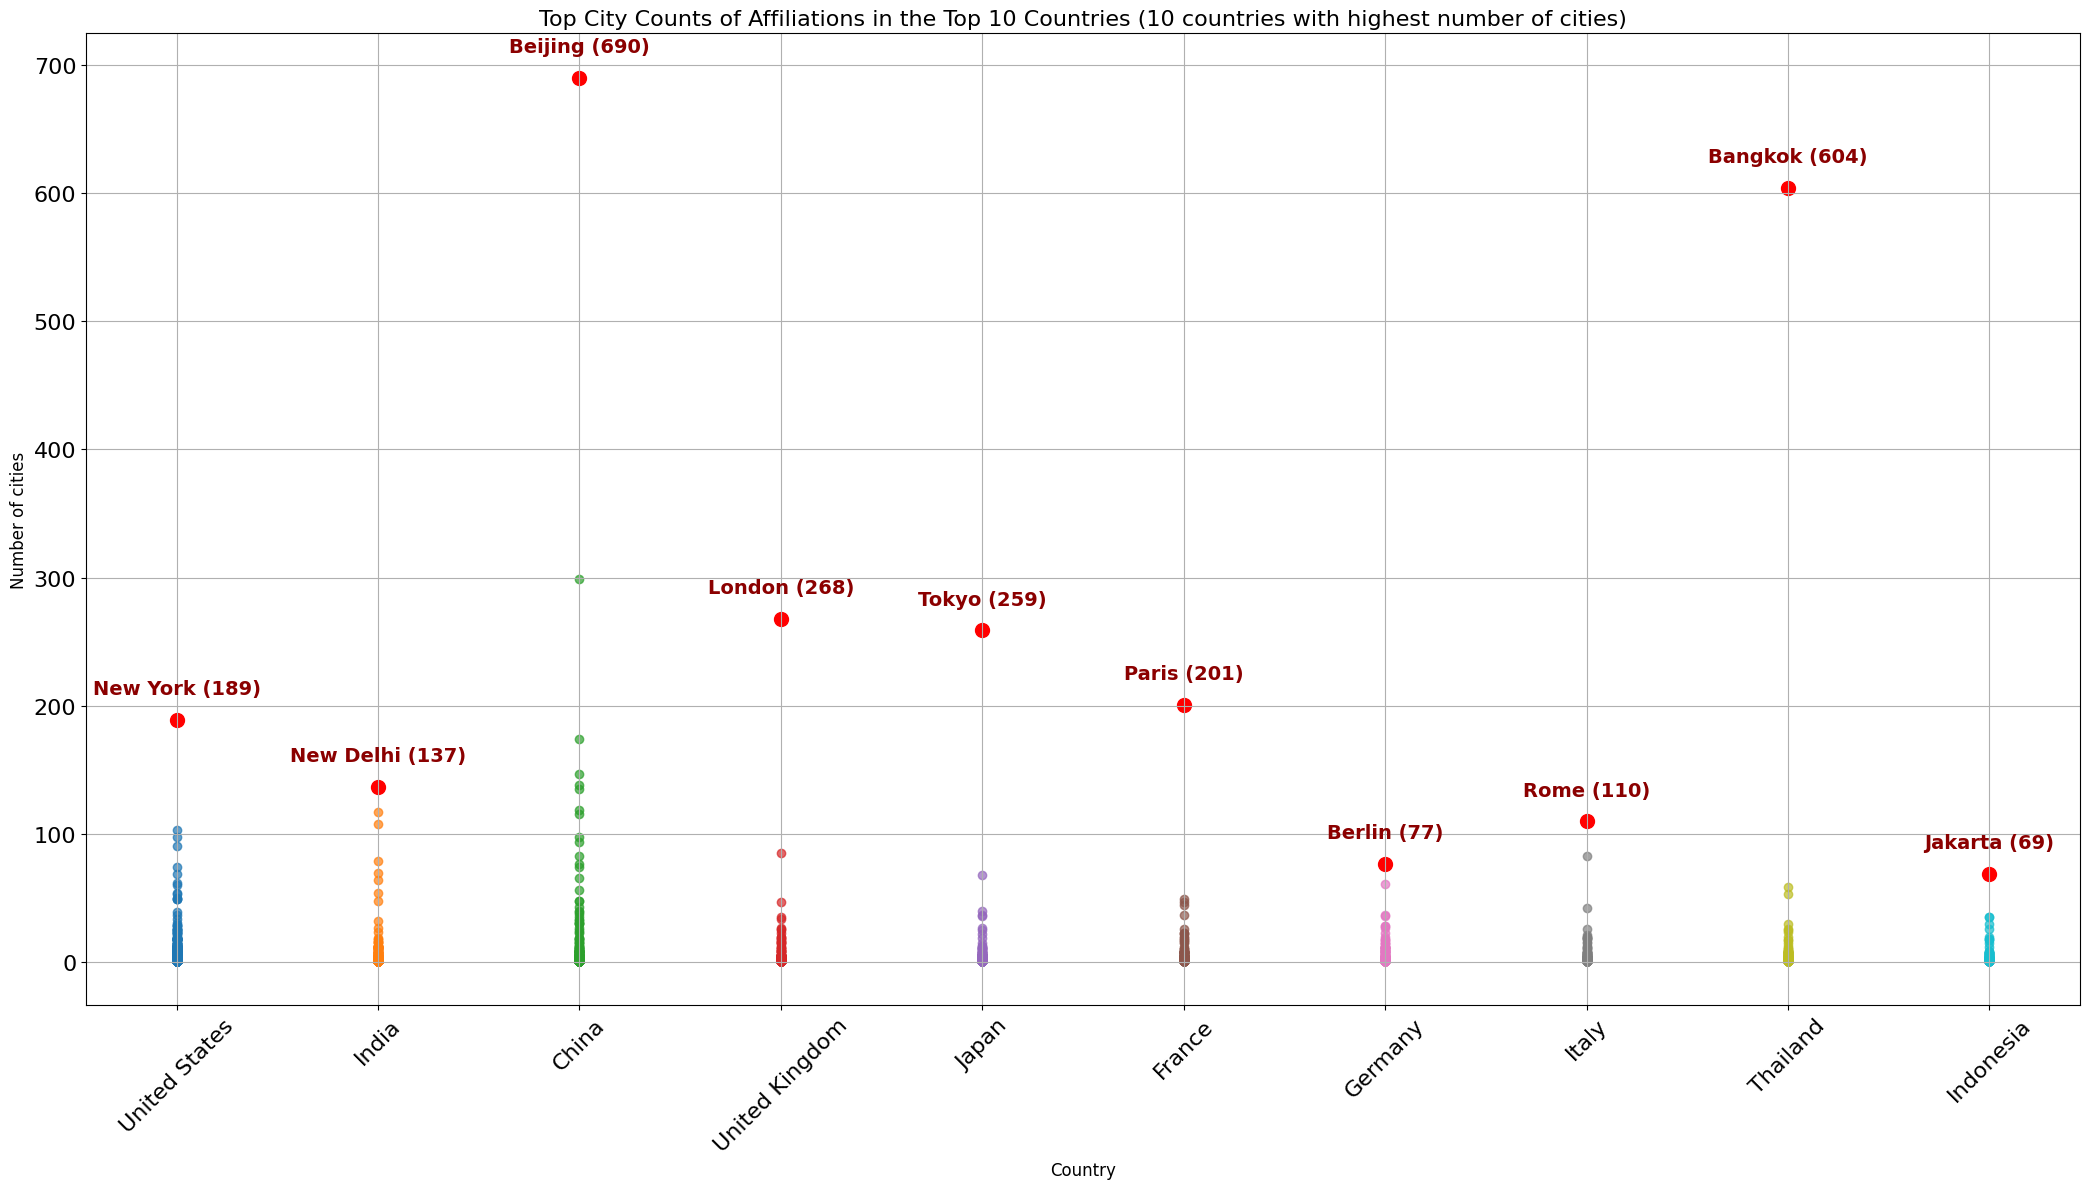

In [22]:
# Grouping data by country and city, then counting the number of entries per city
city_counts = data.groupby(['country', 'city']).size().reset_index(name='counts')

# Selecting the top 10 countries based on the number of unique cities
top_countries = city_counts['country'].value_counts().nlargest(10).index

# Filtering the data for these top 10 countries
top_city_counts = city_counts[city_counts['country'].isin(top_countries)]

# Finding the top city in each country based on the count
top_city_per_country = top_city_counts.loc[top_city_counts.groupby('country')['counts'].idxmax()]

# Assigning unique IDs for each country for plotting purposes
unique_country_ids = {country: idx for idx, country in enumerate(top_countries)}
top_city_counts['country_id'] = top_city_counts['country'].map(unique_country_ids)

# Plotting
plt.figure(figsize=(21, 12))
for country in top_countries:
    subset = top_city_counts[top_city_counts['country'] == country]
    plt.scatter([unique_country_ids[country]] * len(subset), subset['counts'], alpha=0.7)

    # Highlight and label the top city
    top_city = top_city_per_country[top_city_per_country['country'] == country]
    plt.scatter(unique_country_ids[country], top_city['counts'], color='red', s=100)
    label = f"{top_city['city'].values[0]} ({top_city['counts'].values[0]})"
    plt.text(unique_country_ids[country], top_city['counts'] + 20,  # Offset for visibility
             label, fontsize=14, fontweight='bold', ha='center', color='darkred')

# Final plot adjustments
plt.xticks(list(unique_country_ids.values()), top_countries, rotation=45, fontsize = 16)
plt.yticks(fontsize=16)
plt.title('Top City Counts of Affiliations in the Top 10 Countries (10 countries with highest number of cities)', fontsize=16)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of cities', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()